In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New section

===== MCQ ANSWERS =====
1. Total Cost: 11175044.6186


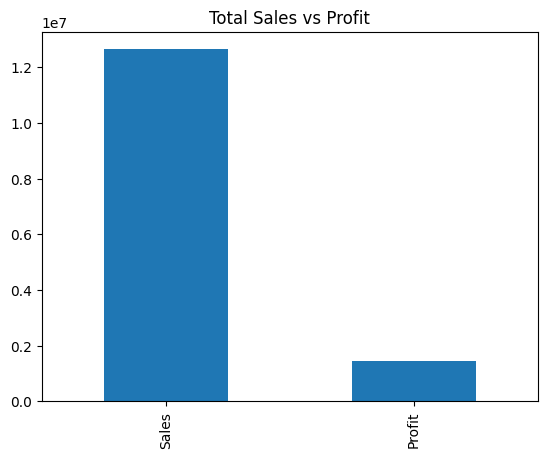

2. Total Profit in India: 129050.595


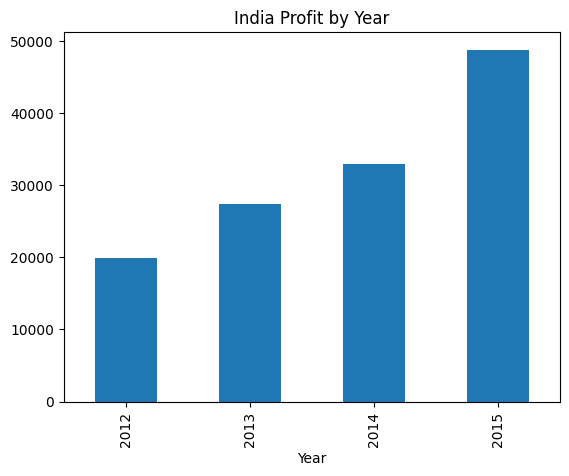

3. 5th Country by Cost: Germany


/tmp/ipython-input-2971440050.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Sales'].sum() - x['Profit'].sum())


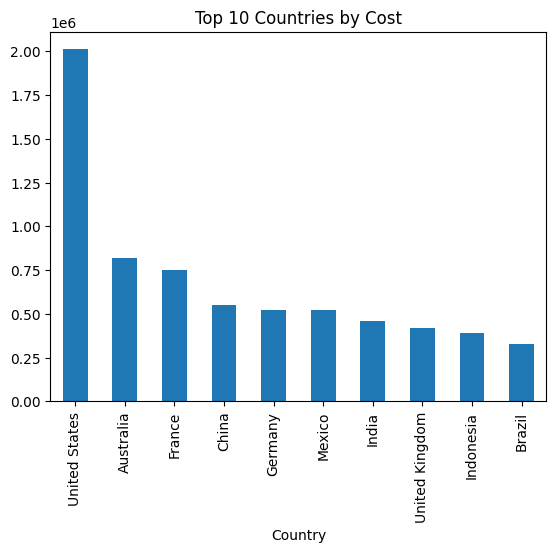

4. Total Sales in 2015: 4299865.870560001


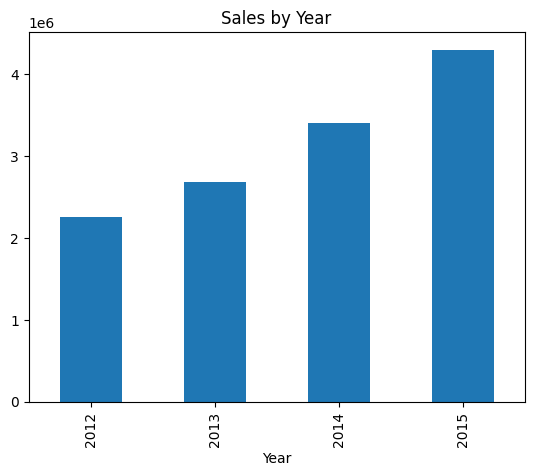

5. Sales Difference: 894119.4211800005
6. China 2015 Quantity: 2293


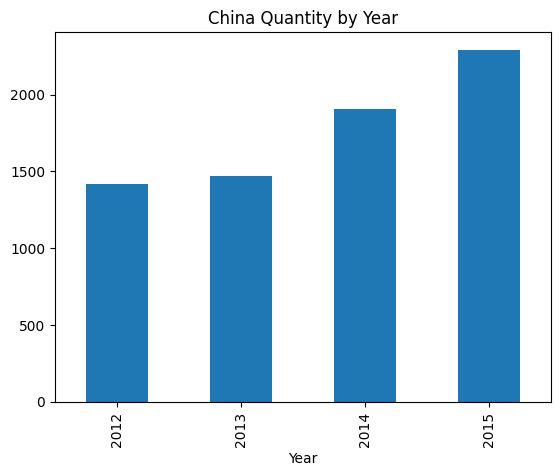

7. Total Discount: 7329.727999999999


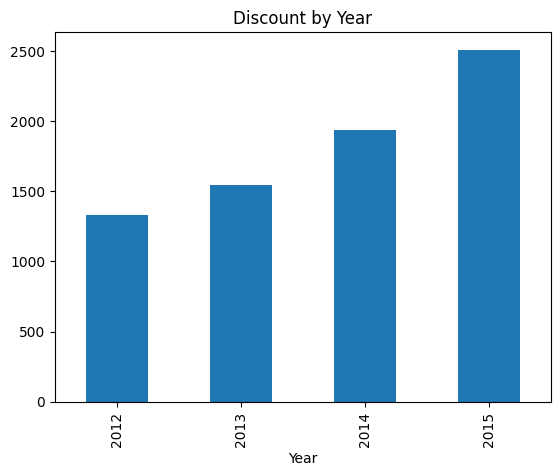

8. China + Australia Quantity: 17754


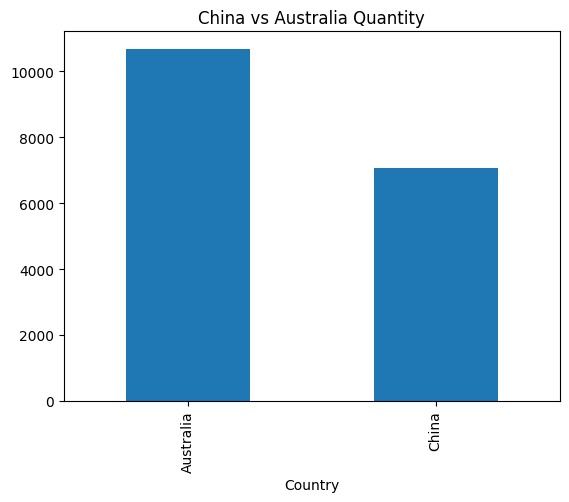

9. July 2015 Profit: 28035.87258
   July 2015 Cost: 230669.8079


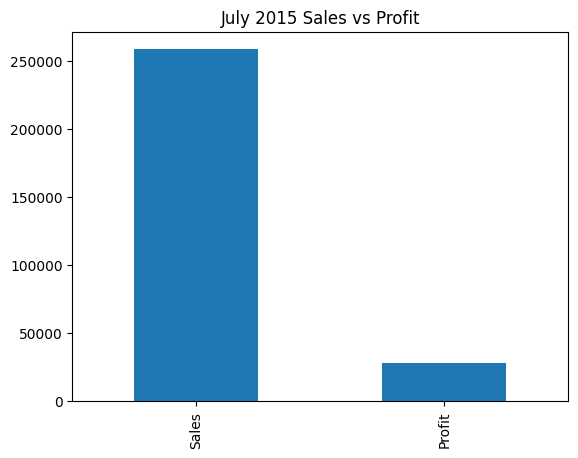

10. Consumer Orders: 13291


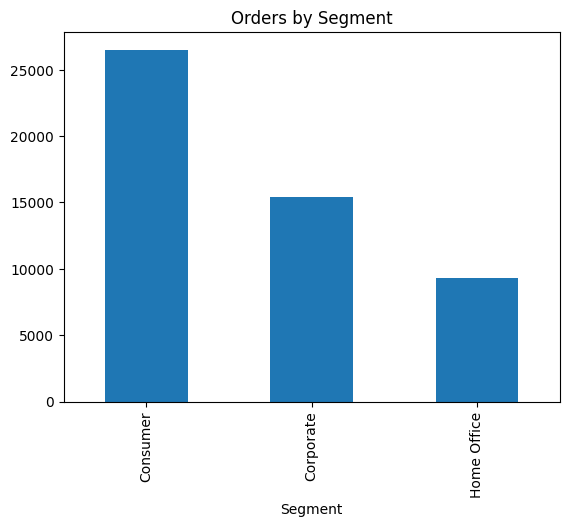

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("global_superstore_2016.xlsx")

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

print("===== MCQ ANSWERS =====")


total_cost = df['Sales'].sum() - df['Profit'].sum()
print("1. Total Cost:", total_cost)

plt.figure()
df[['Sales','Profit']].sum().plot(kind='bar')
plt.title("Total Sales vs Profit")
plt.show()


profit_india = df[df['Country']=="India"]['Profit'].sum()
print("2. Total Profit in India:", profit_india)

plt.figure()
df[df['Country']=="India"].groupby('Year')['Profit'].sum().plot(kind='bar')
plt.title("India Profit by Year")
plt.show()

# 3️⃣ 5th COUNTRY BY COST
cost_country = (
    df.groupby('Country')
    .apply(lambda x: x['Sales'].sum() - x['Profit'].sum())
    .sort_values(ascending=False)
)
print("3. 5th Country by Cost:", cost_country.index[4])

plt.figure()
cost_country.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Cost")
plt.show()


sales_2015 = df[df['Year']==2015]['Sales'].sum()
print("4. Total Sales in 2015:", sales_2015)

plt.figure()
df.groupby('Year')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Year")
plt.show()


sales_2014 = df[df['Year']==2014]['Sales'].sum()
print("5. Sales Difference:", sales_2015 - sales_2014)


china_2015_qty = df[(df['Country']=="China") & (df['Year']==2015)]['Quantity'].sum()
print("6. China 2015 Quantity:", china_2015_qty)

plt.figure()
df[df['Country']=="China"].groupby('Year')['Quantity'].sum().plot(kind='bar')
plt.title("China Quantity by Year")
plt.show()


total_discount = df['Discount'].sum()
print("7. Total Discount:", total_discount)

plt.figure()
df.groupby('Year')['Discount'].sum().plot(kind='bar')
plt.title("Discount by Year")
plt.show()


china_aus_qty = (
    df[df['Country']=="China"]['Quantity'].sum() +
    df[df['Country']=="Australia"]['Quantity'].sum()
)
print("8. China + Australia Quantity:", china_aus_qty)

plt.figure()
df[df['Country'].isin(["China","Australia"])].groupby('Country')['Quantity'].sum().plot(kind='bar')
plt.title("China vs Australia Quantity")
plt.show()


july_2015 = df[(df['Year']==2015) & (df['Month']==7)]
july_profit = july_2015['Profit'].sum()
july_cost = july_2015['Sales'].sum() - july_2015['Profit'].sum()

print("9. July 2015 Profit:", july_profit)
print("   July 2015 Cost:", july_cost)

plt.figure()
july_2015[['Sales','Profit']].sum().plot(kind='bar')
plt.title("July 2015 Sales vs Profit")
plt.show()

consumer_orders = df[df['Segment']=="Consumer"]['Order ID'].nunique()
print("10. Consumer Orders:", consumer_orders)

plt.figure()
df['Segment'].value_counts().plot(kind='bar')
plt.title("Orders by Segment")
plt.show()


===== CORRECTED ANSWERS =====

Q7. Total Discount: 1346352.04


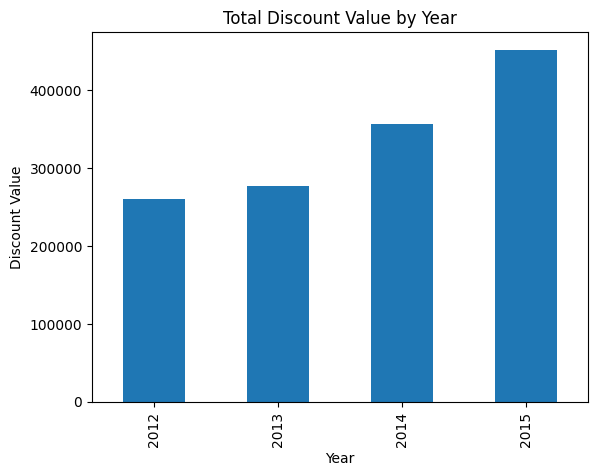

Q8. China + Australia Quantity (2015): 5951


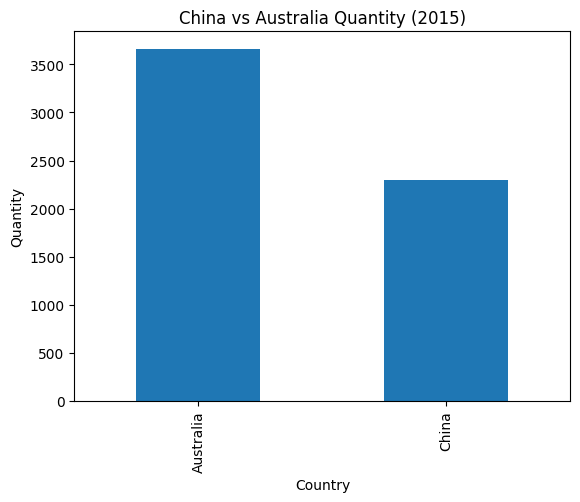

Q10. Consumer Segment Orders: 26518


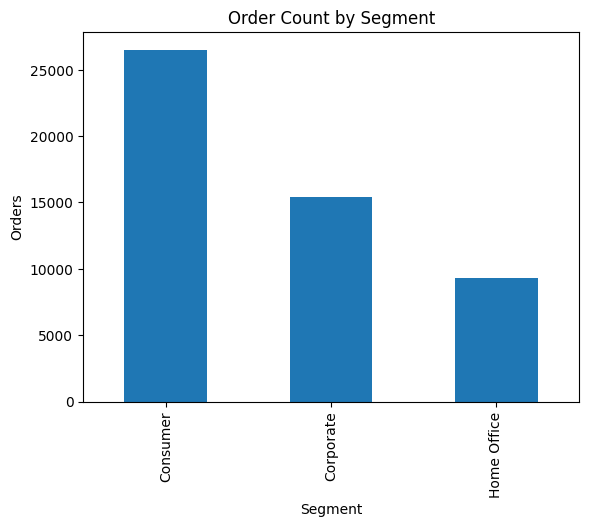

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("global_superstore_2016.xlsx")


df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

print("===== CORRECTED ANSWERS =====")


df['Discount_Value'] = df['Sales'] * df['Discount']
total_discount = df['Discount_Value'].sum()
print("\nQ7. Total Discount:", round(total_discount, 2))


df.groupby('Year')['Discount_Value'].sum().plot(kind='bar')
plt.title("Total Discount Value by Year")
plt.xlabel("Year")
plt.ylabel("Discount Value")
plt.show()

china_aus_qty_2015 = df[
    (df['Country'].isin(['China', 'Australia'])) &
    (df['Year'] == 2015)
]['Quantity'].sum()

print("Q8. China + Australia Quantity (2015):", china_aus_qty_2015)


df[
    (df['Country'].isin(['China','Australia'])) &
    (df['Year'] == 2015)
].groupby('Country')['Quantity'].sum().plot(kind='bar')
plt.title("China vs Australia Quantity (2015)")
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.show()


consumer_orders = df[df['Segment'] == 'Consumer'].shape[0]
print("Q10. Consumer Segment Orders:", consumer_orders)


df['Segment'].value_counts().plot(kind='bar')
plt.title("Order Count by Segment")
plt.xlabel("Segment")
plt.ylabel("Orders")
plt.show()
